In [46]:
%matplotlib inline

In [47]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import absolute_import
from __future__ import division

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as num
sns.set(color_codes=True)

import logging
from collections import Counter, OrderedDict

In [49]:
import cookey
from cookey import keyboard
from cookey import util
from cookey.typist import Typist
from cookey.util import get_logger

In [50]:
typists = OrderedDict([
    (layout_name, Typist(layout)) for layout_name,layout in [
        ('QWERTY', keyboard.QWERTY),
        ('Simplified Dvorak', keyboard.SDVORAK),
        ('Programmers\' Dvorak', keyboard.PDVORAK),
        ('Drunken Dvorak', keyboard.DDVORAK),
        ('Colemak', keyboard.COLEMAK),
        ('Workman', keyboard.WORKMAN),
        ('Programmers\' Workman', keyboard.PWORKMAN),
        ('Norman', keyboard.NORMAN),
    ]
])

In [51]:
def type_all_files(typists, directory='.', patterns=None):
    if patterns is None:
        patterns = ['*.c', '*.h', '*.py', '*.txt', '*.rst']

    chars = [0 for _ in range(256)]
    charcounter = Counter()

    for filename in util.find_files(directory, patterns):
        file = ""
        with open(filename, 'r+b') as f:
            while True:
                bb = f.read(8192*10)
                if not bb:
                    break
                file += bb.decode('ascii', errors='ignore')

        for typist in typists.values():
            typist.type(file)

        for char in file:
            try:
                chars[ord(char)] += 1
            except IndexError:
                pass  # We're not going to worry about non-ascii chars for now
    
    charcounter += Counter({
        chr(char):chars[char] for char in range(256)
    })
    total_chars = sum(charcounter.values())
    
    return (total_chars, charcounter)

In [52]:
%time
num_chars, charcounter = type_all_files(typists, directory='../yapf')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


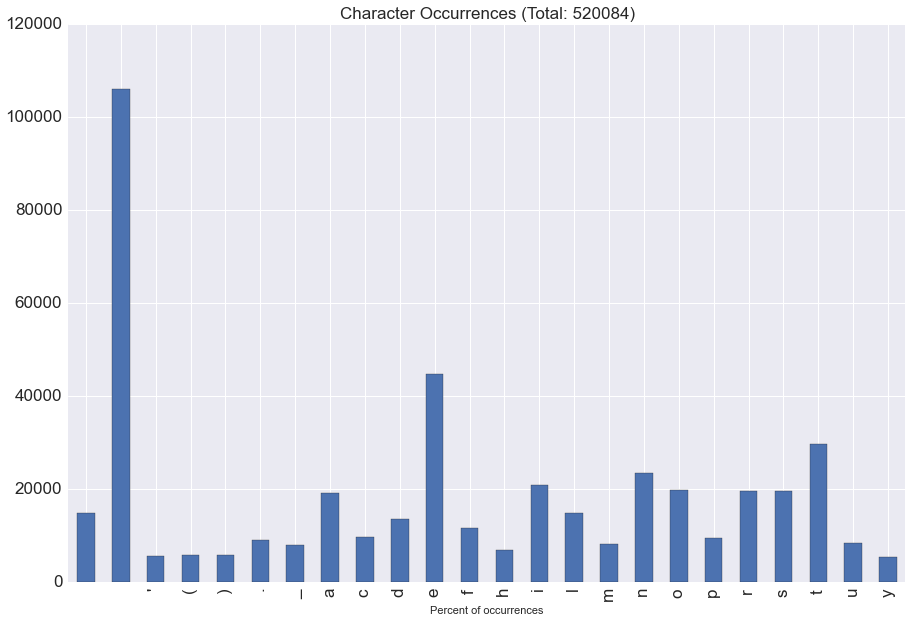

In [81]:
char_count = pd.DataFrame(pd.Series(charcounter), columns=['count'])
char_count['percent'] = char_count['count'].apply(lambda c: round(c/num_chars*100, 3))
char_count_plot = char_count[char_count['percent'] > 1.0]['count'].plot(kind='bar', figsize=(15,10), fontsize=17)
char_count_plot.set_title("Character Occurrences (Total: {})".format(num_chars), fontsize=17)
char_count_plot.set_xlabel("Character")
char_count_plot.set_xlabel("Percent of occurrences")

In [61]:
typist_stats = []
for layout_name,typist in typists.iteritems():
    entry = {'layout': layout_name}
    typist_stats.append(entry)
    
    keystrokes, finger_usage, line_usage, hand_usage, distance, pedalling_coef, nsf_coef = typist.get_stats()
    
    entry['keystrokes'] = keystrokes
    entry['pedalling_coef'] = pedalling_coef
    entry['nsf_coef'] = nsf_coef
    
    r_num, r_top, r_home, r_bot = line_usage
    entry['home_row_pct'] = r_home
    entry['top_row_pct'] = r_top
    entry['bot_row_pct'] = r_bot
    entry['num_row_pct'] = r_num
    
    entry['left_hand'], entry['right_hand'] = hand_usage
    
    lp, lr, lm, li, lt, rt, ri, rm, rr, rp = finger_usage
    entry['left_pinky'] = lp
    entry['left_ring'] = lr
    entry['left_middle'] = lm
    entry['left_index'] = li
    entry['left_thumb'] = lt
    entry['right_thumb'] = rt
    entry['right_index'] = ri
    entry['right_middle'] = rm
    entry['right_ring'] = rr
    entry['right_pinky'] = rp
    
    entry['total_distance'] = sum(distance)

layout_stats = pd.DataFrame(typist_stats).set_index('layout')
layout_stats#[['keystrokes']]

,bot_row_pct,home_row_pct,keystrokes,left_hand,left_index,left_middle,left_pinky,left_ring,left_thumb,nsf_coef,num_row_pct,pedalling_coef,right_hand,right_index,right_middle,right_pinky,right_ring,right_thumb,top_row_pct,total_distance
layout,,,,,,,,,,,,,,,,,,,,
QWERTY,23.288,40.657,583557,42.344,13.494,13.121,11.318,5.220,2.546,74.577,5.466,41.963,57.656,9.834,5.176,12.032,9.094,18.165,30.589,415223
Simplified Dvorak,16.498,60.740,583557,37.420,9.441,10.315,13.090,4.638,2.546,76.909,3.653,46.326,62.580,8.982,8.304,14.966,9.553,18.165,19.108,367633
Programmers' Dvorak,15.723,62.060,571144,38.375,10.823,9.957,11.408,4.809,2.601,76.244,4.423,47.619,61.625,9.988,9.530,13.487,8.837,18.560,17.794,359105
Drunken Dvorak,15.723,62.060,571144,39.283,11.288,9.965,11.611,4.756,2.601,75.449,4.441,48.457,60.717,10.228,8.484,13.718,8.791,18.560,17.777,358873
Colemak,19.270,62.969,583557,35.950,12.015,8.519,11.486,5.075,2.546,77.756,5.466,43.518,64.050,10.619,10.432,13.694,7.450,18.165,12.295,379089
Workman,21.265,58.623,583557,34.388,10.372,6.963,11.764,6.990,2.546,78.228,5.466,39.776,65.612,11.055,10.432,13.649,8.065,18.165,14.646,382934
Programmers' Workman,19.615,59.851,571577,34.871,10.589,7.109,10.153,7.136,2.599,77.201,5.580,40.609,65.129,11.287,10.651,13.697,8.234,18.546,14.953,380786
Norman,20.639,58.623,583557,38.940,10.331,13.121,11.559,5.220,2.546,75.201,5.466,42.428,61.060,10.451,8.339,11.173,9.094,18.165,15.273,376504


In [82]:
ks = layout_stats['keystrokes']
layout_stats['ks_pct'] = layout_stats['keystrokes'].apply(lambda c: round((c-ks.max())*100.0/ks.max(),2))
layout_stats[['ks_pct']]#.plot(kind='bar', fontsize=17).set_title("Keystroke Difference (Minimum: {})".format(ks.min()))

,ks_pct
layout,
QWERTY,0.00
Simplified Dvorak,0.00
Programmers' Dvorak,-2.13
Drunken Dvorak,-2.13
Colemak,0.00
Workman,0.00
Programmers' Workman,-2.05
Norman,0.00


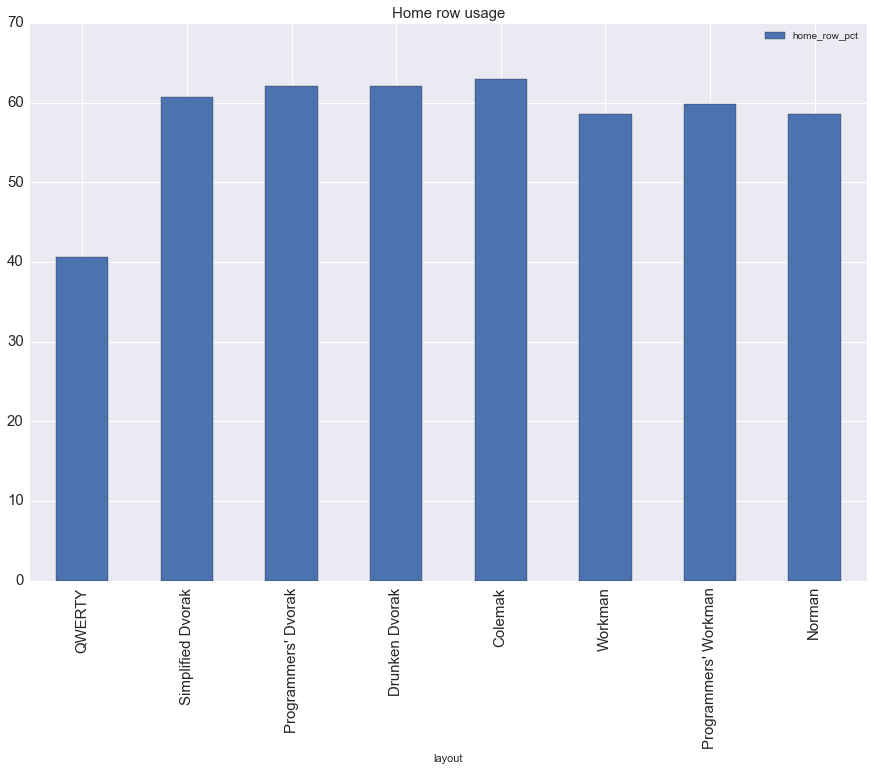

In [74]:
layout_stats[['home_row_pct']].plot(kind='bar', figsize=(15,10), fontsize=17).set_title("Home row usage", fontsize=17)

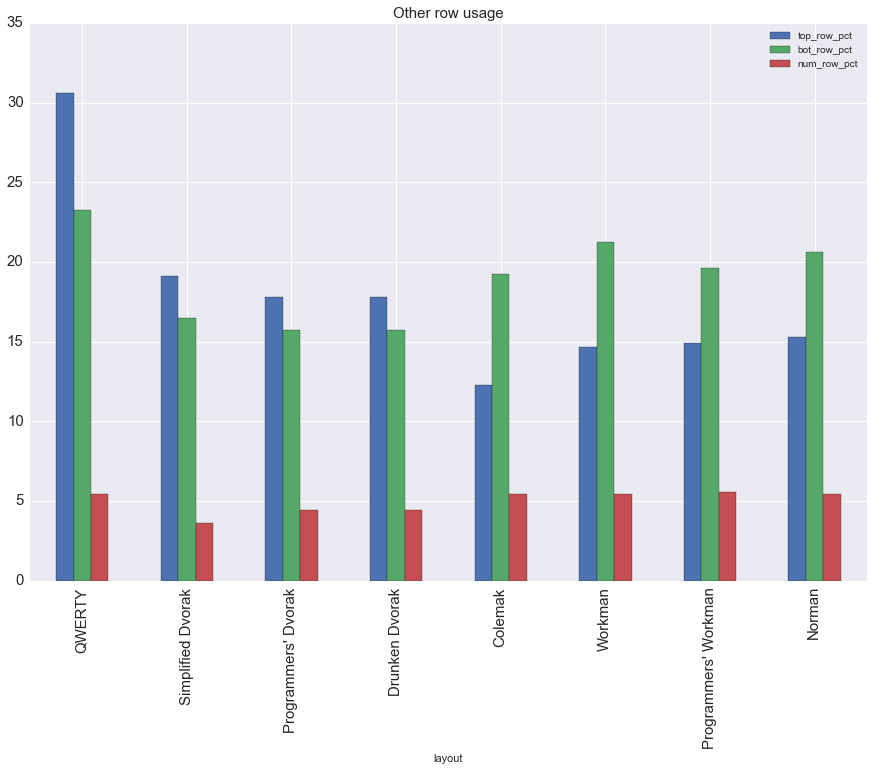

In [76]:
layout_stats[['top_row_pct', 'bot_row_pct', 'num_row_pct']].plot(kind='bar', figsize=(15,10), fontsize=17).set_title("Other row usage", fontsize=17)

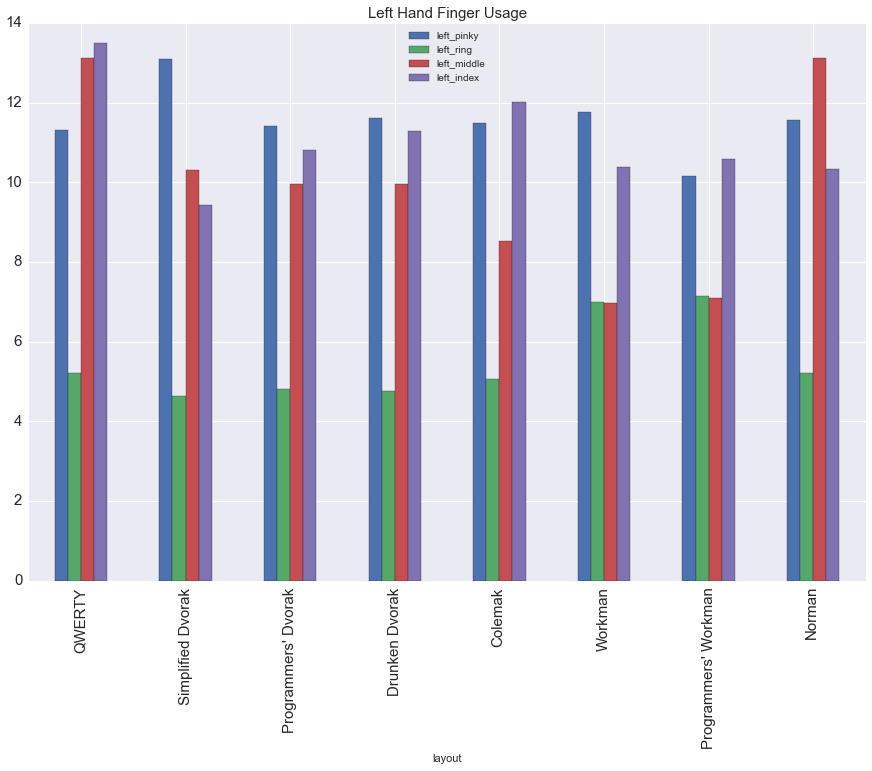

In [78]:
layout_stats[['left_pinky','left_ring', 'left_middle', 'left_index']].plot(kind='bar', figsize=(15,10), fontsize=17).set_title("Left Hand Finger Usage", fontsize=17)

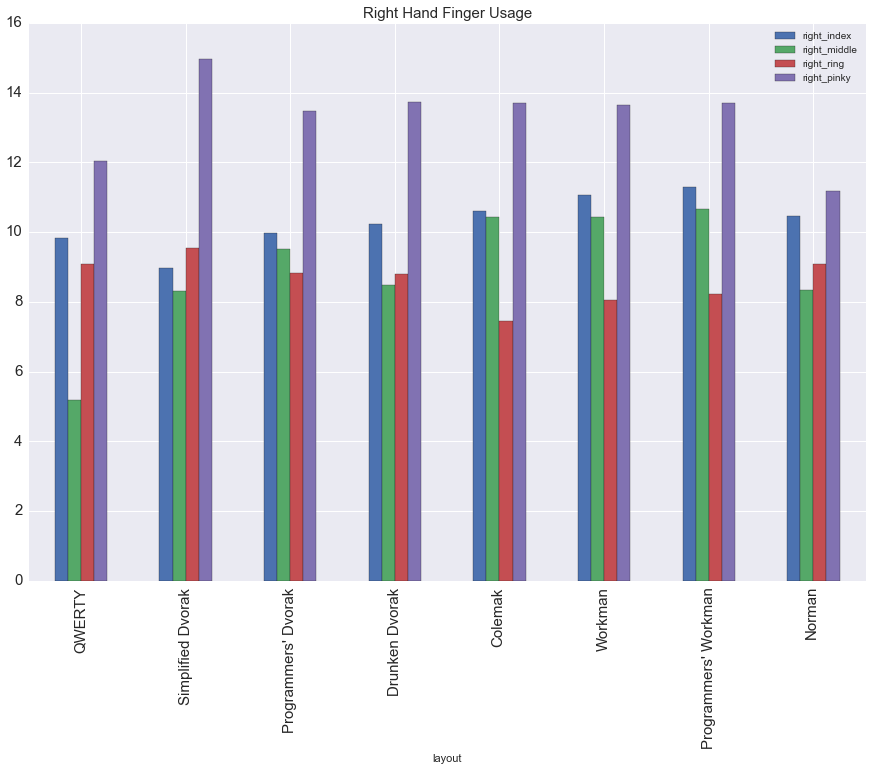

In [80]:
layout_stats[['right_index', 'right_middle', 'right_ring', 'right_pinky']].plot(kind='bar', figsize=(15,10), fontsize=17).set_title("Right Hand Finger Usage", fontsize=17)

In [84]:
td = layout_stats['total_distance']
max_d = td.max()
layout_stats['dist_gain'] = td.apply(lambda c: round(c/max_d*100,2))
layout_stats[['dist_gain', 'pedalling_coef', 'nsf_coef']].sort('dist_gain', ascending=False) #.plot(kind='barh', figsize=(15,10))

,dist_gain,pedalling_coef,nsf_coef
layout,,,
QWERTY,100.00,41.963,74.577
Workman,92.22,39.776,78.228
Programmers' Workman,91.71,40.609,77.201
Colemak,91.30,43.518,77.756
Norman,90.68,42.428,75.201
Simplified Dvorak,88.54,46.326,76.909
Programmers' Dvorak,86.48,47.619,76.244
Drunken Dvorak,86.43,48.457,75.449
